In [2]:

import pandas as pd
import ydata_profiling as yp 

import matplotlib.pyplot as plt

# Ensure this package is installed and available

file_path = './Baltimore911.csv' 

try:
    # Load the data
    df = pd.read_csv(file_path, low_memory=False)
except FileNotFoundError:
    print(f"No such file or directory: '{file_path}'")
except pd.errors.EmptyDataError:
    print(f"No data in file: '{file_path}'")
except pd.errors.ParserError:
    print(f"Error parsing file: '{file_path}'")
else:
    try:
        # Generate the profiling report
        profile = yp.ProfileReport(df, title='Profiling Report', explorative=True)

        # Save the report
        profile.to_file("BaltimoreReport.html")
    except Exception as e:
        print(f"An error occurred while generating the profile report: {str(e)}")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1]:
import pandas as pd
file_path = './Baltimore911.csv'

In [2]:
import pandas as pd
file_path = './Baltimore911.csv'
data = pd.read_csv(file_path, low_memory=False)# Get number of rows and columns
#data.profile_report()

In [3]:
print("---------Printing the names of the coulmns-------")
# Get and print column names
column_names = data.columns
print("Column Names:", column_names)
data.shape

---------Printing the names of the coulmns-------
Column Names: Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood',
       'Longitude', 'Latitude', 'Location 1', 'Premise', 'vri_name1',
       'Total Incidents'],
      dtype='object')


(292761, 16)

In [4]:


# Convert 'CrimeDate' and 'CrimeTime' to datetime and time objects respectively
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])
data['CrimeTime'] = pd.to_datetime(data['CrimeTime'], format='%H:%M:%S').dt.time
data['Inside/Outside'] = data['Inside/Outside'].replace('Outside', 'O')
data['Inside/Outside'] = data['Inside/Outside'].replace('Inside', 'I')

if all(data['Inside/Outside'].isin(['I', 'O'])) or data['Inside/Outside'].isna().any():
    print("----Inside/Outside' column is clean!------")
else:
    print("Unexpected values found in 'Inside/Outside' column!")

    # Specify data types for each column
column_types = {
    'CrimeCode': 'string',
    'Location': 'string',
    'Description': 'category',
    'Inside/Outside': 'category',
    'Weapon': 'category',
    'Post': 'category',
    'District': 'category',
    'Neighborhood': 'string',
    'Longitude': 'float',
    'Latitude': 'float',
    'Location 1': 'string',
    'Premise': 'string',
    'vri_name1': 'category',
    'Total Incidents': 'int'
}

# Bulk conversion of data types
data = data.astype(column_types)

# Checking initial shape of data.
print(f"Original Shape: {data.shape}")

#Cleaning Data 
#Removing loc_1 as its is empty 
data = data.drop(columns=['Location 1'])
date_counts = data['CrimeDate'].value_counts()

# Ensure 'CrimeDate' is in datetime format
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'], errors='coerce')

# Filter data to keep only rows where the year is 2010 or later
data = data[data['CrimeDate'].dt.year >= 2010]


# Removing duplicates based on all columns.
data = data.drop_duplicates()
print(f"After Removing Duplicates: {data.shape}")


# Drop rows with many missing values
threshold = len(data.columns) - 7  
data = data.dropna(thresh=threshold)
print(f"After Removing row's who's each coulmn's data >7 : {data.shape}")

# Export the DataFrame to an Excel file
data.to_csv('./Baltimore911Output.csv', index=False)  


----Inside/Outside' column is clean!------
Original Shape: (292761, 16)
After Removing Duplicates: (281274, 15)
After Removing row's who's each coulmn's data >7 : (281173, 15)


In [6]:
import pandas as pd
file_path = './Baltimore911Output.csv' 

data = pd.read_csv(file_path, low_memory=False)

def column_profile(data, col_name):
    profile = {'name': col_name,
               'total_count': len(data[col_name]),
               'missing_count': data[col_name].isna().sum(),
               'missing_percent': (data[col_name].isna().sum()/len(data[col_name])) * 100}

    if pd.api.types.is_numeric_dtype(data[col_name]):
        profile['type'] = 'numeric'
        profile['min'] = data[col_name].min()
        profile['max'] = data[col_name].max()
        profile['mean'] = data[col_name].mean()
        profile['median'] = data[col_name].median()
        profile['std_dev'] = data[col_name].std()
    elif pd.api.types.is_datetime64_any_dtype(data[col_name]):
        profile['type'] = 'temporal'
    elif pd.api.types.is_string_dtype(data[col_name]):
        profile['type'] = 'discrete'
        profile['unique_values'] = data[col_name].nunique()
        profile['top_3_values'] = data[col_name].value_counts().head(3).to_dict()
    # Assuming spatial data is stored as strings with coordinates, 
    # modify as per your specific use case
    elif 'lat' in col_name.lower() or 'lon' in col_name.lower() or 'location' in col_name.lower():
        profile['type'] = 'spatial'
        profile['unique_values'] = data[col_name].nunique()
        profile['top_3_values'] = data[col_name].value_counts().head(3).to_dict()
    else:
        profile['type'] = 'other'

    return profile

# Ensure the date column is in datetime format
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'], errors='coerce')


lowest_10_values = data.nsmallest(10, 'CrimeDate')
print(lowest_10_values)

# Usage
def generate_data_profile(data):
    profiles = []
    for col in data.columns:
        profiles.append(column_profile(data, col))
    return pd.DataFrame(profiles)

# Example with a dataset
data_url = './Baltimore911Output.csv'
data = pd.read_csv(data_url,low_memory=False)
profile_df = generate_data_profile(data)

display(profile_df)

        CrimeDate CrimeTime CrimeCode              Location Description  \
281171 2010-01-01  00:01:00        2A   500 S WASHINGTON ST        RAPE   
281172 2010-01-01  00:01:00        2A     2600 LLEWELYN AVE        RAPE   
281170 2010-04-10  00:00:00        2A   1300 W LAFAYETTE AV        RAPE   
281168 2011-01-01  00:00:00        2A  1300 W LAFAYETTE AVE        RAPE   
281169 2011-01-01  10:00:00        2A           900 DENISON        RAPE   
281167 2011-04-01  16:00:00        2A      3000 HARVIEW AVE        RAPE   
281165 2011-06-01  13:00:00        2A       1100 HARLEM AVE        RAPE   
281166 2011-06-01  00:01:00        2B         3100 SAVOY ST        RAPE   
281164 2011-07-01  15:00:00        2A      2600 E OLIVER ST        RAPE   
281163 2011-10-01  00:00:00        2A      2500 W NORTH AVE        RAPE   

       Inside/Outside Weapon Post   District         Neighborhood  Longitude  \
281171              I  OTHER  213  SOUTHEAST          FELLS POINT -76.588708   
281172        

,name,total_count,missing_count,missing_percent,type,unique_values,top_3_values,min,max,mean,median,std_dev
0,CrimeDate,281173,0,0.000000,discrete,2257.0,"{'2015-04-27': 353, '2017-01-20': 199, '2017-1...",NaN,NaN,NaN,NaN,NaN
1,CrimeTime,281173,26,0.009247,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CrimeCode,281173,0,0.000000,discrete,81.0,"{'4E': 44859, '6D': 38092, '5A': 25108}",NaN,NaN,NaN,NaN,NaN
3,Location,281173,1190,0.423227,spatial,27055.0,"{'1500 RUSSELL ST': 795, '3500 BOSTON ST': 700...",NaN,NaN,NaN,NaN,NaN
4,Description,281173,0,0.000000,discrete,14.0,"{'LARCENY': 64705, 'COMMON ASSAULT': 44859, 'B...",NaN,NaN,NaN,NaN,NaN
5,Inside/Outside,281173,32141,11.431041,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Weapon,281173,225196,80.091616,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Post,281173,2152,0.765365,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,District,281173,0,0.000000,discrete,10.0,"{'NORTHEAST': 42651, 'SOUTHEAST': 40186, 'CENT...",NaN,NaN,NaN,NaN,NaN
9,Neighborhood,281173,9952,3.539458,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Comment on anything surprising/strange/unique you noted from the data profile.
The Weapon column has a high level of missing data at approximately 79%. The vri_name1 column also has a substantial level of missing data at approximately 88%.
I note that vri_name1 also has many missing data , If a column has a substantial number of missing values, consider dropping the column.(results derived from Chat GPT)
Removed duplicate values
Extreme Coordinate Values:
The Latitude and Longitude columns have some surprising minimum values that seem unrealistic (e.g., Latitude 37.577262, Longitude -81.529189). These may indicate erroneous data entry or outliers and might need further validation or correction.


### Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations;

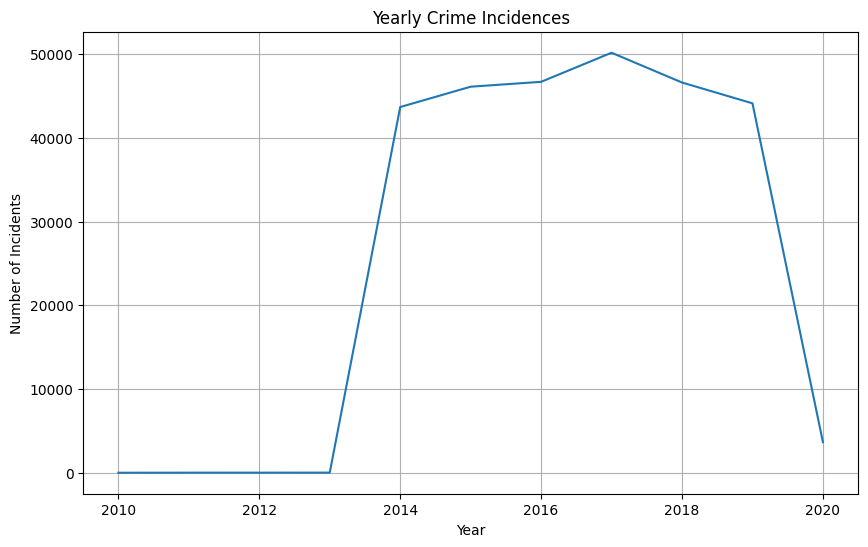

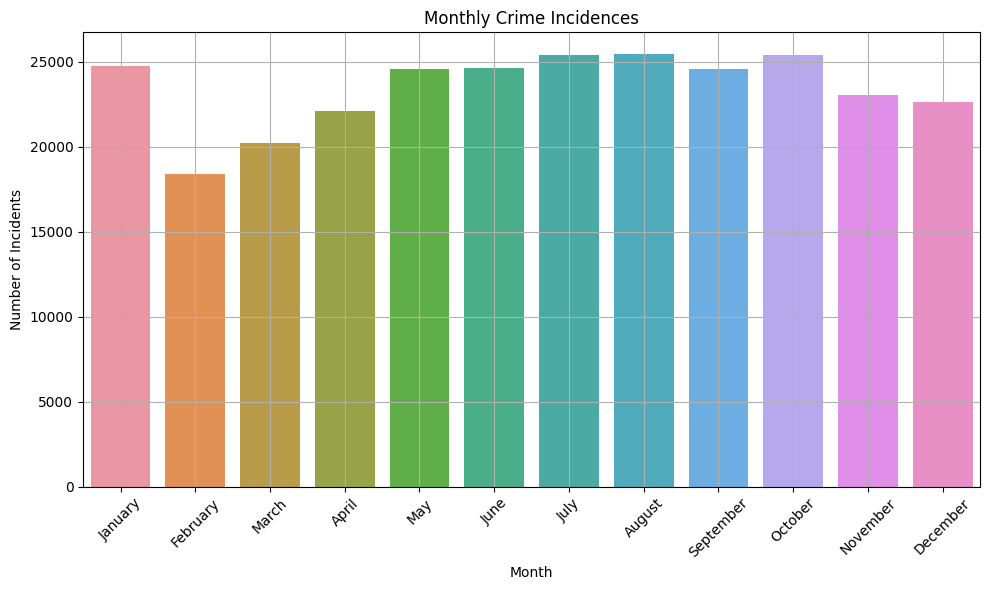

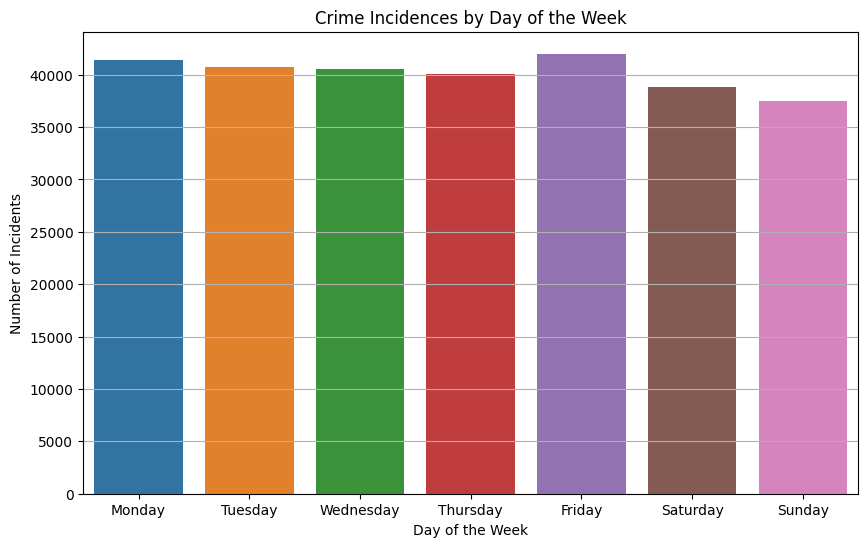

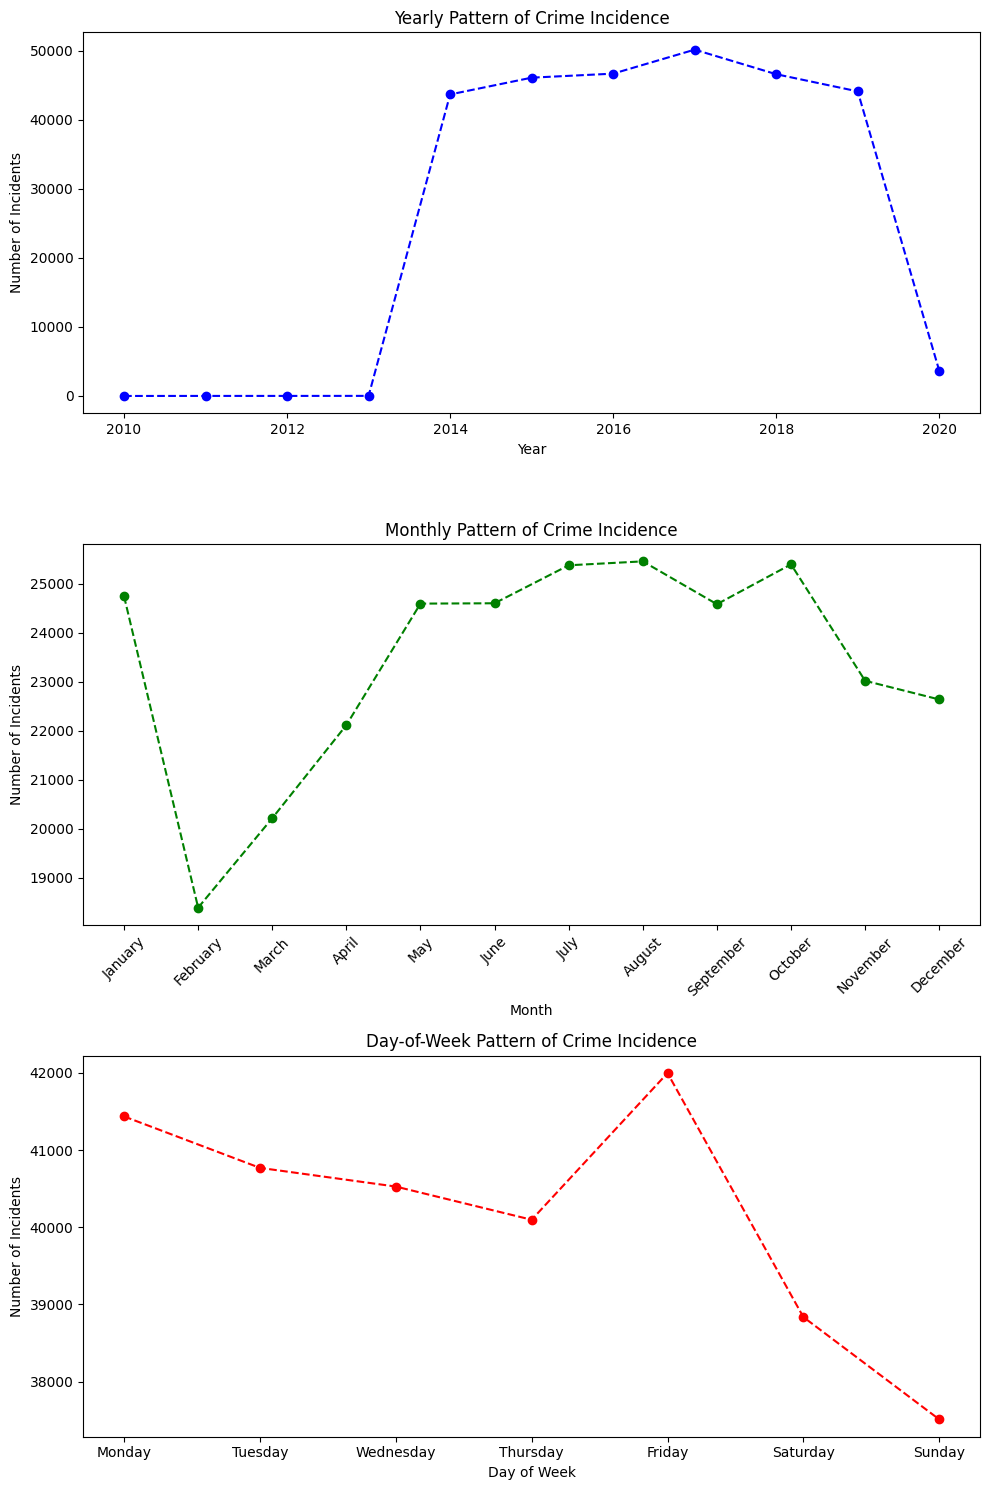

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
#file_path = './Baltimore911Output.csv' 

#data = pd.read_csv(file_path, low_memory=False)

data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])

# Extract year and count incidents.
yearly_data = data['CrimeDate'].dt.year.value_counts().sort_index()

# Plotting.
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_data.index, y=yearly_data.values)
plt.title('Yearly Crime Incidences')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Extract month name and count incidents.
monthly_data = data['CrimeDate'].dt.strftime('%B').value_counts().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plotting.
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_data.index, y=monthly_data.values)
plt.title('Monthly Crime Incidences')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()  
plt.show()



# Extract day of the week and count incidents.
data['DayOfWeek'] = data['CrimeDate'].dt.day_name()
dow_data = data['DayOfWeek'].value_counts()

# Plotting.
plt.figure(figsize=(10, 6))
sns.barplot(x=dow_data.index, y=dow_data.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crime Incidences by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.grid(True, axis='y')
plt.show()


import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'CrimeDate' is your date column

# Ensure the date column is in datetime format
data['CrimeDate'] = pd.to_datetime(data['CrimeDate'], errors='coerce')

# Extract year, month, and day of week
data['Year'] = data['CrimeDate'].dt.year
data['Month'] = data['CrimeDate'].dt.strftime('%B')
data['Day_of_Week'] = data['CrimeDate'].dt.day_name()

# Create a subplot of 3 graphs
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Yearly Pattern
yearly_data = data.groupby('Year').size()
axes[0].plot(yearly_data.index, yearly_data.values, marker='o', linestyle='dashed', color='b')
axes[0].set_title('Yearly Pattern of Crime Incidence')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Incidents')

# Monthly Pattern
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_data = data.groupby('Month').size().reindex(ordered_months)
axes[1].plot(monthly_data.index, monthly_data.values, marker='o', linestyle='dashed', color='g')
axes[1].set_title('Monthly Pattern of Crime Incidence')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Number of Incidents')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Day-of-Week Pattern
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_data = data.groupby('Day_of_Week').size().reindex(ordered_days)
axes[2].plot(dow_data.index, dow_data.values, marker='o', linestyle='dashed', color='r')
axes[2].set_title('Day-of-Week Pattern of Crime Incidence')
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Number of Incidents')

# Adjust the layout and show the plots
plt.tight_layout()
plt.show()

## Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods

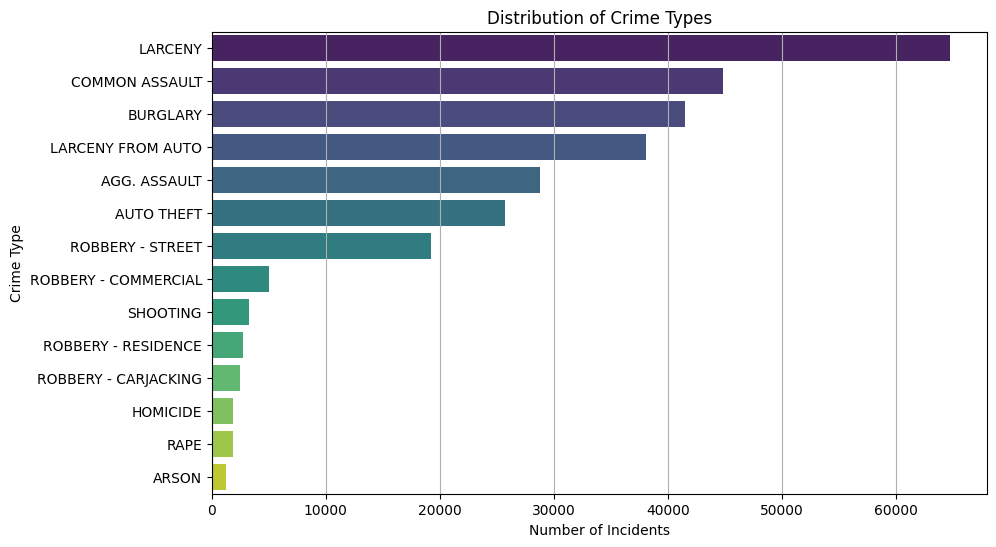

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
file_path = './Baltimore911Output.csv' 


# Count the occurrences of each crime type
crime_count = data['Description'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(y=crime_count.index, x=crime_count.values, palette='viridis')
plt.title('Distribution of Crime Types')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.grid(axis='x')
plt.show()

## Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations.

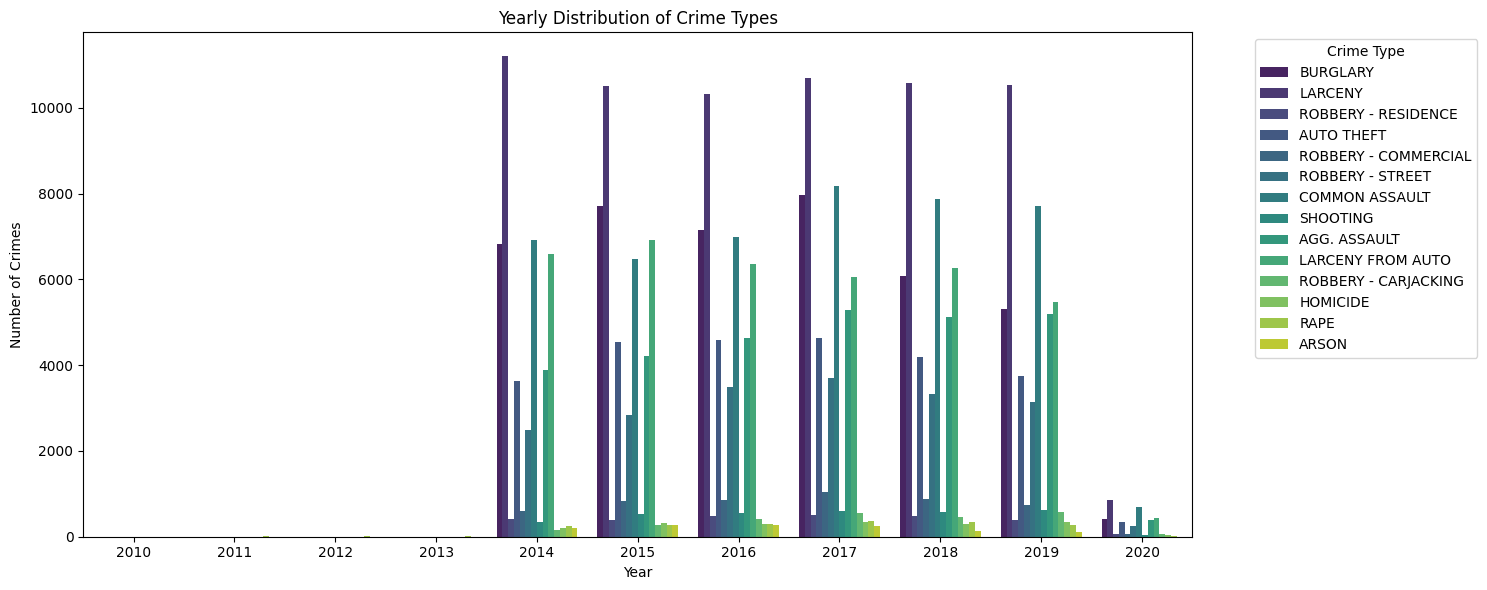

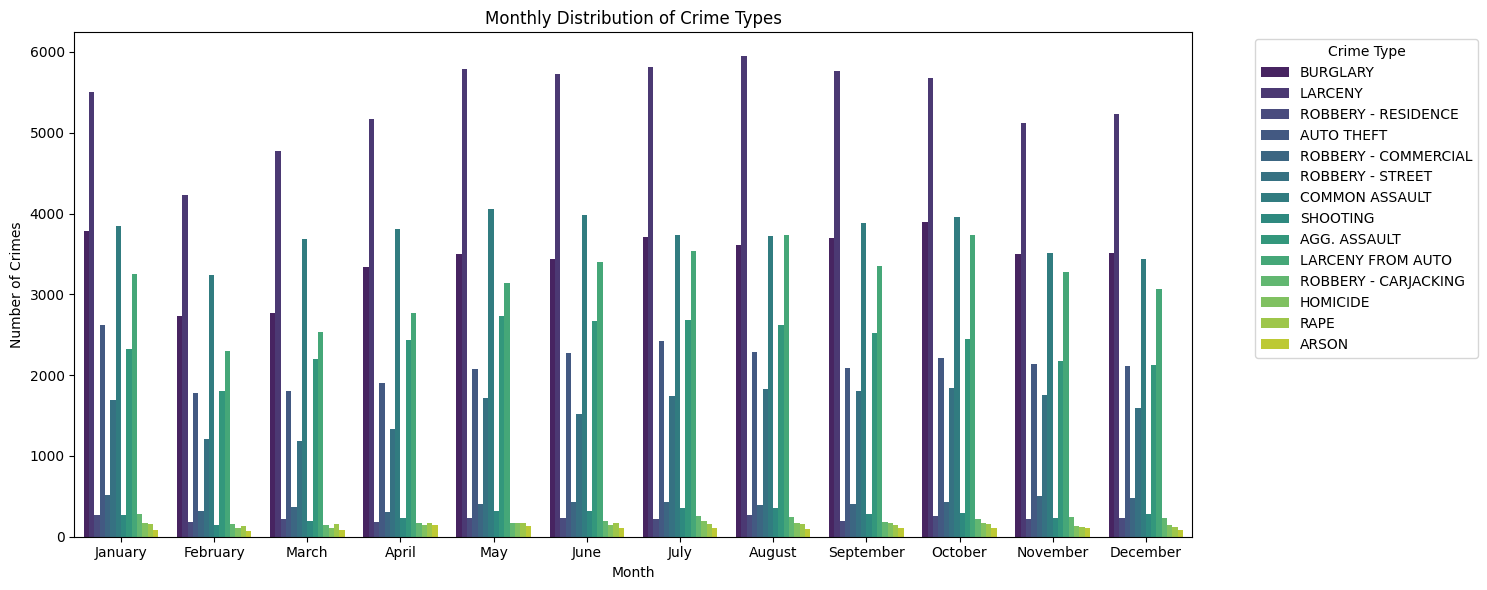

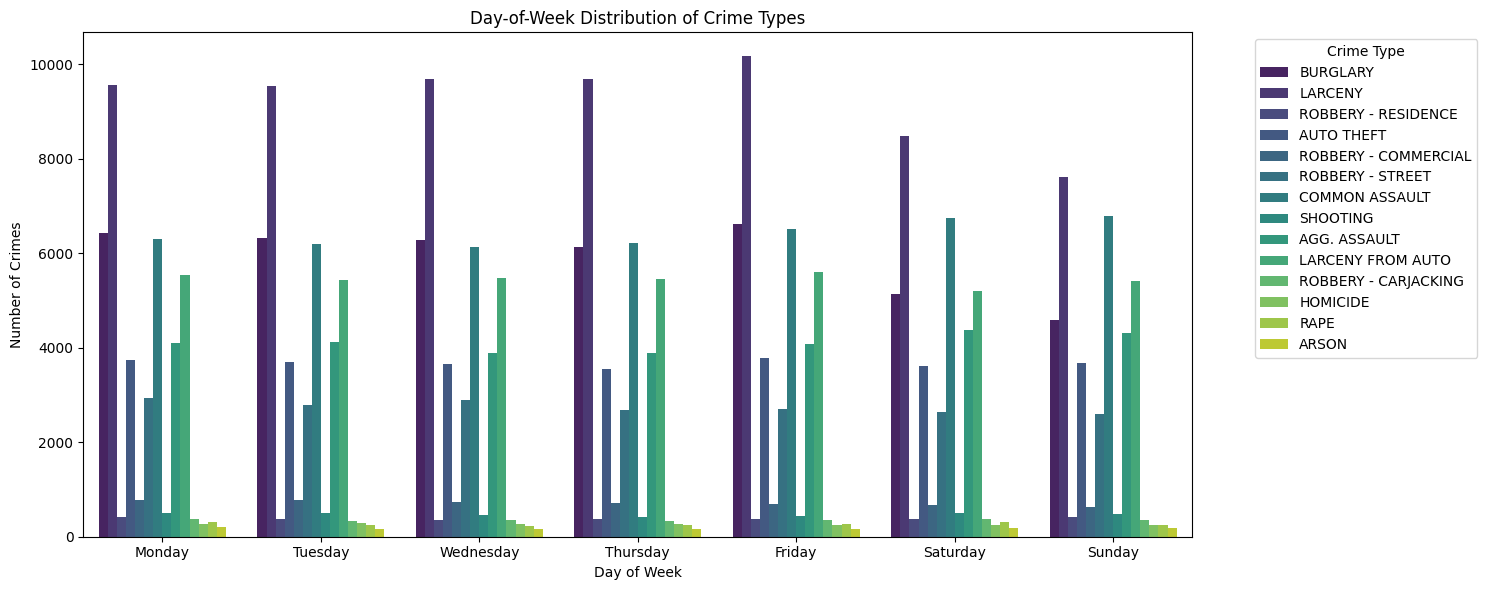

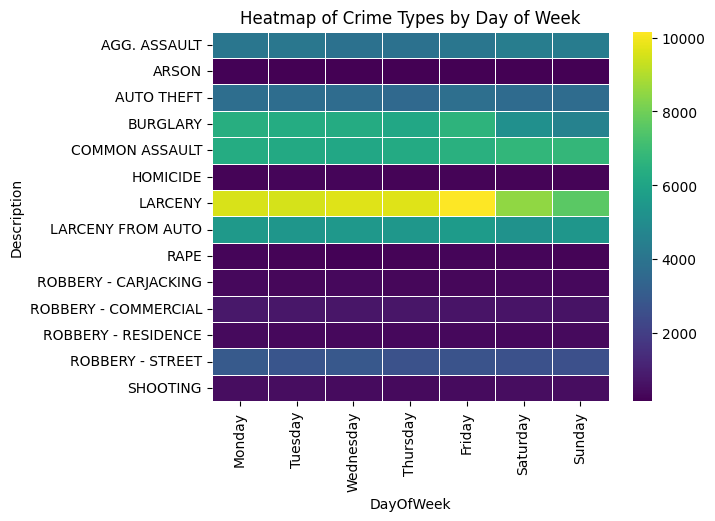

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



file_path = './Baltimore911Output.csv' 

data = pd.read_csv(file_path, low_memory=False)

data['CrimeDate'] = pd.to_datetime(data['CrimeDate'])

# Extract Year, Month, and Day-of-Week
data['Year'] = data['CrimeDate'].dt.year
data['Month'] = data['CrimeDate'].dt.strftime('%B')
data['DayOfWeek'] = data['CrimeDate'].dt.day_name()

# Yearly Crime Type Distribution
plt.figure(figsize=(15, 6))
sns.countplot(x='Year', hue='Description', data=data, palette='viridis')
plt.title('Yearly Distribution of Crime Types')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



# Monthly Crime Type Distribution
plt.figure(figsize=(15, 6))
sns.countplot(x='Month', hue='Description', data=data, order=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], palette='viridis')
plt.title('Monthly Distribution of Crime Types')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Day-of-Week Crime Type Distribution
plt.figure(figsize=(15, 6))
sns.countplot(x='DayOfWeek', hue='Description', data=data, order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
], palette='viridis')
plt.title('Day-of-Week Distribution of Crime Types')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


crime_day_pivot = data.pivot_table(index='Description', columns='DayOfWeek', values='CrimeDate', aggfunc='count')
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.heatmap(crime_day_pivot[ordered_days], cmap='viridis', linewidths=.5)
plt.title('Heatmap of Crime Types by Day of Week')
plt.show()



